# Houseing Price Prediction

### STATEMENT: Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. Thedata is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? • How do these variables describe the price of the house?

### import libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PowerTransformer
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import random
import joblib
%matplotlib inline

### Importing train dataset

In [2]:
data=pd.read_csv('train.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

### Above is my train dataset on which i have to build a predictive model. And I have to use the saved best model to predict sales price in test dataset.SalesPrice is my target and since data of SalesPrice column is continous it is a Regression Problem.

In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Exploratory Data Analysis

In [4]:
print('Number of rows x columns in dataset are:',data.shape)

Number of rows x columns in dataset are: (1168, 81)


### In my train dataset i have 1168 rows and 81 columns

In [5]:
pd.set_option('max_columns', None)
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   127         120       RL          NaN     4928   Pave   NaN      IR1   
1   889          20       RL         95.0    15865   Pave   NaN      IR1   
2   793          60       RL         92.0     9920   Pave   NaN      IR1   
3   110          20       RL        105.0    11751   Pave   NaN      IR1   
4   422          20       RL          NaN    16635   Pave   NaN      IR1   
5  1197          60       RL         58.0    14054   Pave   NaN      IR1   
6   561          20       RL          NaN    11341   Pave   NaN      IR1   
7  1041          20       RL         88.0    13125   Pave   NaN      Reg   
8   503          20       RL         70.0     9170   Pave   NaN      Reg   
9   576          50       RL         80.0     8480   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
5         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
7         Lvl    AllPub    Corner       Gtl       Sawyer       Norm   
8         Lvl    AllPub    Corner       Gtl      Edwards      Feedr   
9         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   
5       Norm     1Fam     2Story            7            5       2006   
6       Norm     1Fam     1Story            5            6       1957   
7       Norm     1Fam     1Story            5            4       1957   
8       Norm     1Fam     1Story            5            7       1965   
9       Norm     1Fam     1.5Fin            5            5       1947   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   
5          2006     Gable  CompShg     VinylSd     VinylSd       None   
6          1996       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
7          2000     Gable  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
8          1965       Hip  CompShg     MetalSd     MetalSd       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   
5         0.0        Gd        TA      PConc       Gd       TA           Av   
6       180.0        TA        TA     CBlock       Gd       TA           No   
7        67.0        TA        TA     CBlock       TA       TA           No   
8         0.0        TA        TA     CBlock       TA       TA     

In [6]:
print('Dataset contains any null values:',data.isnull().values.any())

Dataset contains any null values: True


### from above we can understand we have null values present in train dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Above is the info about train dataset and i can see some missing values in the dataset. I have to take care of those missing values.

### replace all null value in categorical colun with 0 as it merely represents that the feature is not available for the property

In [8]:
listy=['Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
      'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for j in listy:
    for i in range(len(data[j])):
        if str(data[j][i])=='nan' or str(data[j][i])=='None' or str(data[j][i])=='NA' or str(data[j][i])=='No':
            data[j][i]=0

In [9]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave     0      IR1   
1  889          20       RL         95.0    15865   Pave     0      IR1   
2  793          60       RL         92.0     9920   Pave     0      IR1   
3  110          20       RL        105.0    11751   Pave     0      IR1   
4  422          20       RL          NaN    16635   Pave     0      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood          0   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng          0   
2          1997     Gable  CompShg     MetalSd     MetalSd          0   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA            0   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA            0   
4       126.0        Gd        TA     CBlock       Gd       TA            0   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

### for missing values in column lotfrontage we fill data using mean value of the column

In [10]:
data['LotFrontage']=data['LotFrontage'].fillna(round(data['LotFrontage'].mean()))

### check if dataset contains any more null value

In [11]:
print('Dataset contains any null values:',data.isnull().values.any())

Dataset contains any null values: False


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          1168 non-null   object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### from above we can verify there are no more null values & know the datatypes of each column.

In [13]:
data=data.drop(['Id'],axis=1)

### ID column was dropped because it contains unique value for every row
###  ID is the identity number given for perticular asset so this ID has nothing to do with model training so i can drop this column.

In [14]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.990582   10484.749144     6.104452     5.595890   
std      41.940650    22.437057    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    71.000000    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000   
mean   1970.930651   1984.758562   101.696918   444.726027    46.647260   
std      30.145255     20.785185   182.218483   462.664785   163.520016   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295  1869.799658   
std        0.817229      0.216292      1.598484     0.650575   451.037303   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000  1957.750000   
50%        3.000000      1.000000      6.000000     1.000000  1977.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1168.000000  1168.000000  1168.000000  1168.000000    1168.000000   
mean      1.776541   476.860445    96.206336    46.559932      23.015411   
std       0.745554   214.466769   126.158988    66.381023      63.191089   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    70.000000   

### Conv all categorical columns to datatype numerical

### assign every category one unique value of every column

In [15]:
dicty={}
for j in ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
          'LandSlope','Neighborhood','Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd',
         'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
         'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
          'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
          'SaleType','SaleCondition','Alley']:
    for i in data[[j]]:
        dicto={}
        for j in range(len(data[i].unique())):
            dicto[data[i].unique()[j]]=j
        dicty[i]=dicto
dicty

{'MSZoning': {'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4},
 'Street': {'Pave': 0, 'Grvl': 1},
 'LotShape': {'IR1': 0, 'Reg': 1, 'IR2': 2, 'IR3': 3},
 'LandContour': {'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3},
 'Utilities': {'AllPub': 0},
 'LotConfig': {'Inside': 0, 'CulDSac': 1, 'FR2': 2, 'Corner': 3, 'FR3': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'NPkVill': 0,
  'NAmes': 1,
  'NoRidge': 2,
  'NWAmes': 3,
  'Gilbert': 4,
  'Sawyer': 5,
  'Edwards': 6,
  'IDOTRR': 7,
  'CollgCr': 8,
  'Mitchel': 9,
  'Crawfor': 10,
  'BrDale': 11,
  'StoneBr': 12,
  'BrkSide': 13,
  'NridgHt': 14,
  'OldTown': 15,
  'Somerst': 16,
  'Timber': 17,
  'SWISU': 18,
  'SawyerW': 19,
  'ClearCr': 20,
  'Veenker': 21,
  'Blmngtn': 22,
  'MeadowV': 23,
  'Blueste': 24},
 'Condition1': {'Norm': 0,
  'Feedr': 1,
  'RRAn': 2,
  'PosA': 3,
  'RRAe': 4,
  'Artery': 5,
  'PosN': 6,
  'RRNe': 7,
  'RRNn': 8},
 'Condition2': {'Norm': 0,
  'RRAe': 1,
  'Feedr': 2,
  'PosN': 3,
  'Artery':

### there are few columns having same category value present in it, value assigned to the datapoints of all these columns should be equal
### keep all null values as 0 value again

In [16]:
dicty['BsmtFinType1']['ALQ']=6
dicty['BsmtFinType1'][0]=0
dicty['BsmtFinType2']['Unf']=4
dicty['BsmtFinType2'][0]=0
dicty['CentralAir']['Y']=1
dicty['CentralAir']['N']=0
dicty['GarageType']['Attchd']=4
dicty['GarageType'][0]=0
dicty['GarageFinish']={'RFn': 2, 'Unf': 1, 'Fin': 3, 0: 0}
dicty['PavedDrive']['Y']=1
dicty['PavedDrive']['N']=0
dicty['Condition2']=dicty['Condition1']
dicty['Exterior2nd']={'Plywood': 0,'Wd Sdng': 1,'MetalSd': 2,'CmentBd': 3,'VinylSd': 4,'HdBoard': 5,'Wd Shng': 7,'Stucco': 6,
  'ImStucc': 12,'Stone': 9,'BrkFace': 8,'AsbShng': 10,'Brk Cmn': 13,'AsphShn': 11,'Other': 14}
dicty['ExterQual']={'TA': 3, 'Gd': 4, 'Fa': 2, 'Po': 1, 'Ex': 5, 0:0}
dicty['PoolQC']=dicty['ExterQual']
dicty['GarageCond']=dicty['ExterQual']
dicty['GarageQual']=dicty['ExterQual']
dicty['FireplaceQu']=dicty['ExterQual']
dicty['KitchenQual']=dicty['ExterQual']
dicty['BsmtExposure']={0: 0, 'Gd': 3, 'Av': 2, 'Mn': 1}
dicty['BsmtCond']=dicty['ExterQual']
dicty['HeatingQC']=dicty['ExterQual']
dicty['BsmtQual']=dicty['ExterQual']
dicty['ExterCond']=dicty['ExterQual']
dicty['BsmtFinType2']=dicty['BsmtFinType1']
dicty['Street']=dicty['Alley']
dicty['Fence']={0: 0, 'MnPrv': 3, 'GdPrv': 4, 'GdWo': 2, 'MnWw': 1}
dicty['Functional']={'Typ': 6,'Mod': 3,'Maj1': 2,'Min1': 5,'Min2': 4,'Sev': 0,'Maj2': 1}
dicty['LotShape']={'IR1': 2, 'Reg': 3, 'IR2': 1, 'IR3': 0}
dicty

{'MSZoning': {'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4},
 'Street': {0: 0, 'Grvl': 1, 'Pave': 2},
 'LotShape': {'IR1': 2, 'Reg': 3, 'IR2': 1, 'IR3': 0},
 'LandContour': {'Lvl': 0, 'Bnk': 1, 'HLS': 2, 'Low': 3},
 'Utilities': {'AllPub': 0},
 'LotConfig': {'Inside': 0, 'CulDSac': 1, 'FR2': 2, 'Corner': 3, 'FR3': 4},
 'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'Neighborhood': {'NPkVill': 0,
  'NAmes': 1,
  'NoRidge': 2,
  'NWAmes': 3,
  'Gilbert': 4,
  'Sawyer': 5,
  'Edwards': 6,
  'IDOTRR': 7,
  'CollgCr': 8,
  'Mitchel': 9,
  'Crawfor': 10,
  'BrDale': 11,
  'StoneBr': 12,
  'BrkSide': 13,
  'NridgHt': 14,
  'OldTown': 15,
  'Somerst': 16,
  'Timber': 17,
  'SWISU': 18,
  'SawyerW': 19,
  'ClearCr': 20,
  'Veenker': 21,
  'Blmngtn': 22,
  'MeadowV': 23,
  'Blueste': 24},
 'Condition1': {'Norm': 0,
  'Feedr': 1,
  'RRAn': 2,
  'PosA': 3,
  'RRAe': 4,
  'Artery': 5,
  'PosN': 6,
  'RRNe': 7,
  'RRNn': 8},
 'Condition2': {'Norm': 0,
  'Feedr': 1,
  'RRAn': 2,
  'PosA': 3,
  'RR

### Apply these values to respective categorical column

In [17]:
for j in ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig',
          'LandSlope','Neighborhood','Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd',
         'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
         'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
          'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
          'SaleType','SaleCondition','Alley']:
    for i in [j]:
        data[i]=data[i].apply(lambda x:dicty[i][x])

### print dataset and checkthese columns

In [18]:
data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0         120         0         71.0     4928       2      0         2   
1          20         0         95.0    15865       2      0         2   
2          60         0         92.0     9920       2      0         2   
3          20         0        105.0    11751       2      0         2   
4          20         0         71.0    16635       2      0         2   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            0          0          0          0             0           0   
1            0          0          0          1             1           0   
2            0          0          1          0             2           0   
3            0          0          0          0             3           0   
4            0          0          2          0             3           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           0         0           0            6            5       1976   
1           0         1           0            8            6       1970   
2           0         1           1            7            5       1996   
3           0         1           0            6            6       1977   
4           0         1           0            6            7       1977   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          1976          0         0            0            0           0   
1          1970          1         1            1            1           0   
2          1997          0         0            2            2           0   
3          1977          2         0            0            0           1   
4          2000          0         0            3            3           2   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0         0.0          3          3           0         4         3   
1         0.0          4          4           1         3         4   
2         0.0          4          3           1         4         3   
3       480.0          3          3           0         4         3   
4       126.0          4          3           0         4         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             0             6         120             3           0   
1             3             6         351             4         823   
2             2             1         862             3           0   
3             0             2         705             3           0   
4             0             6        1246             3           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        958         1078        0          3           1           0   
1       1043         2217        0          5           1           0   
2        255         1117        0          5           1           0   
3       1139         1844        0          5           1           0   
4        356         1602        0          4           1           0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         0             2             1            3             5   
1         2         0             4             1            4             8   
2         2         1             3             1            3             8   
3         2         0             3             1            3             7   
4      

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   int64  
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   int64  
 5   Alley          1168 non-null   int64  
 6   LotShape       1168 non-null   int64  
 7   LandContour    1168 non-null   int64  
 8   Utilities      1168 non-null   int64  
 9   LotConfig      1168 non-null   int64  
 10  LandSlope      1168 non-null   int64  
 11  Neighborhood   1168 non-null   int64  
 12  Condition1     1168 non-null   int64  
 13  Condition2     1168 non-null   int64  
 14  BldgType       1168 non-null   int64  
 15  HouseStyle     1168 non-null   int64  
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

### using info we can verify that all categorical value of dtype object have turned into int dtype

### while assigning values we saw that only category was available in utilities column, hence drop this column

In [20]:
data=data.drop(['Utilities'],axis=1)

### plot graph of all continous data columns

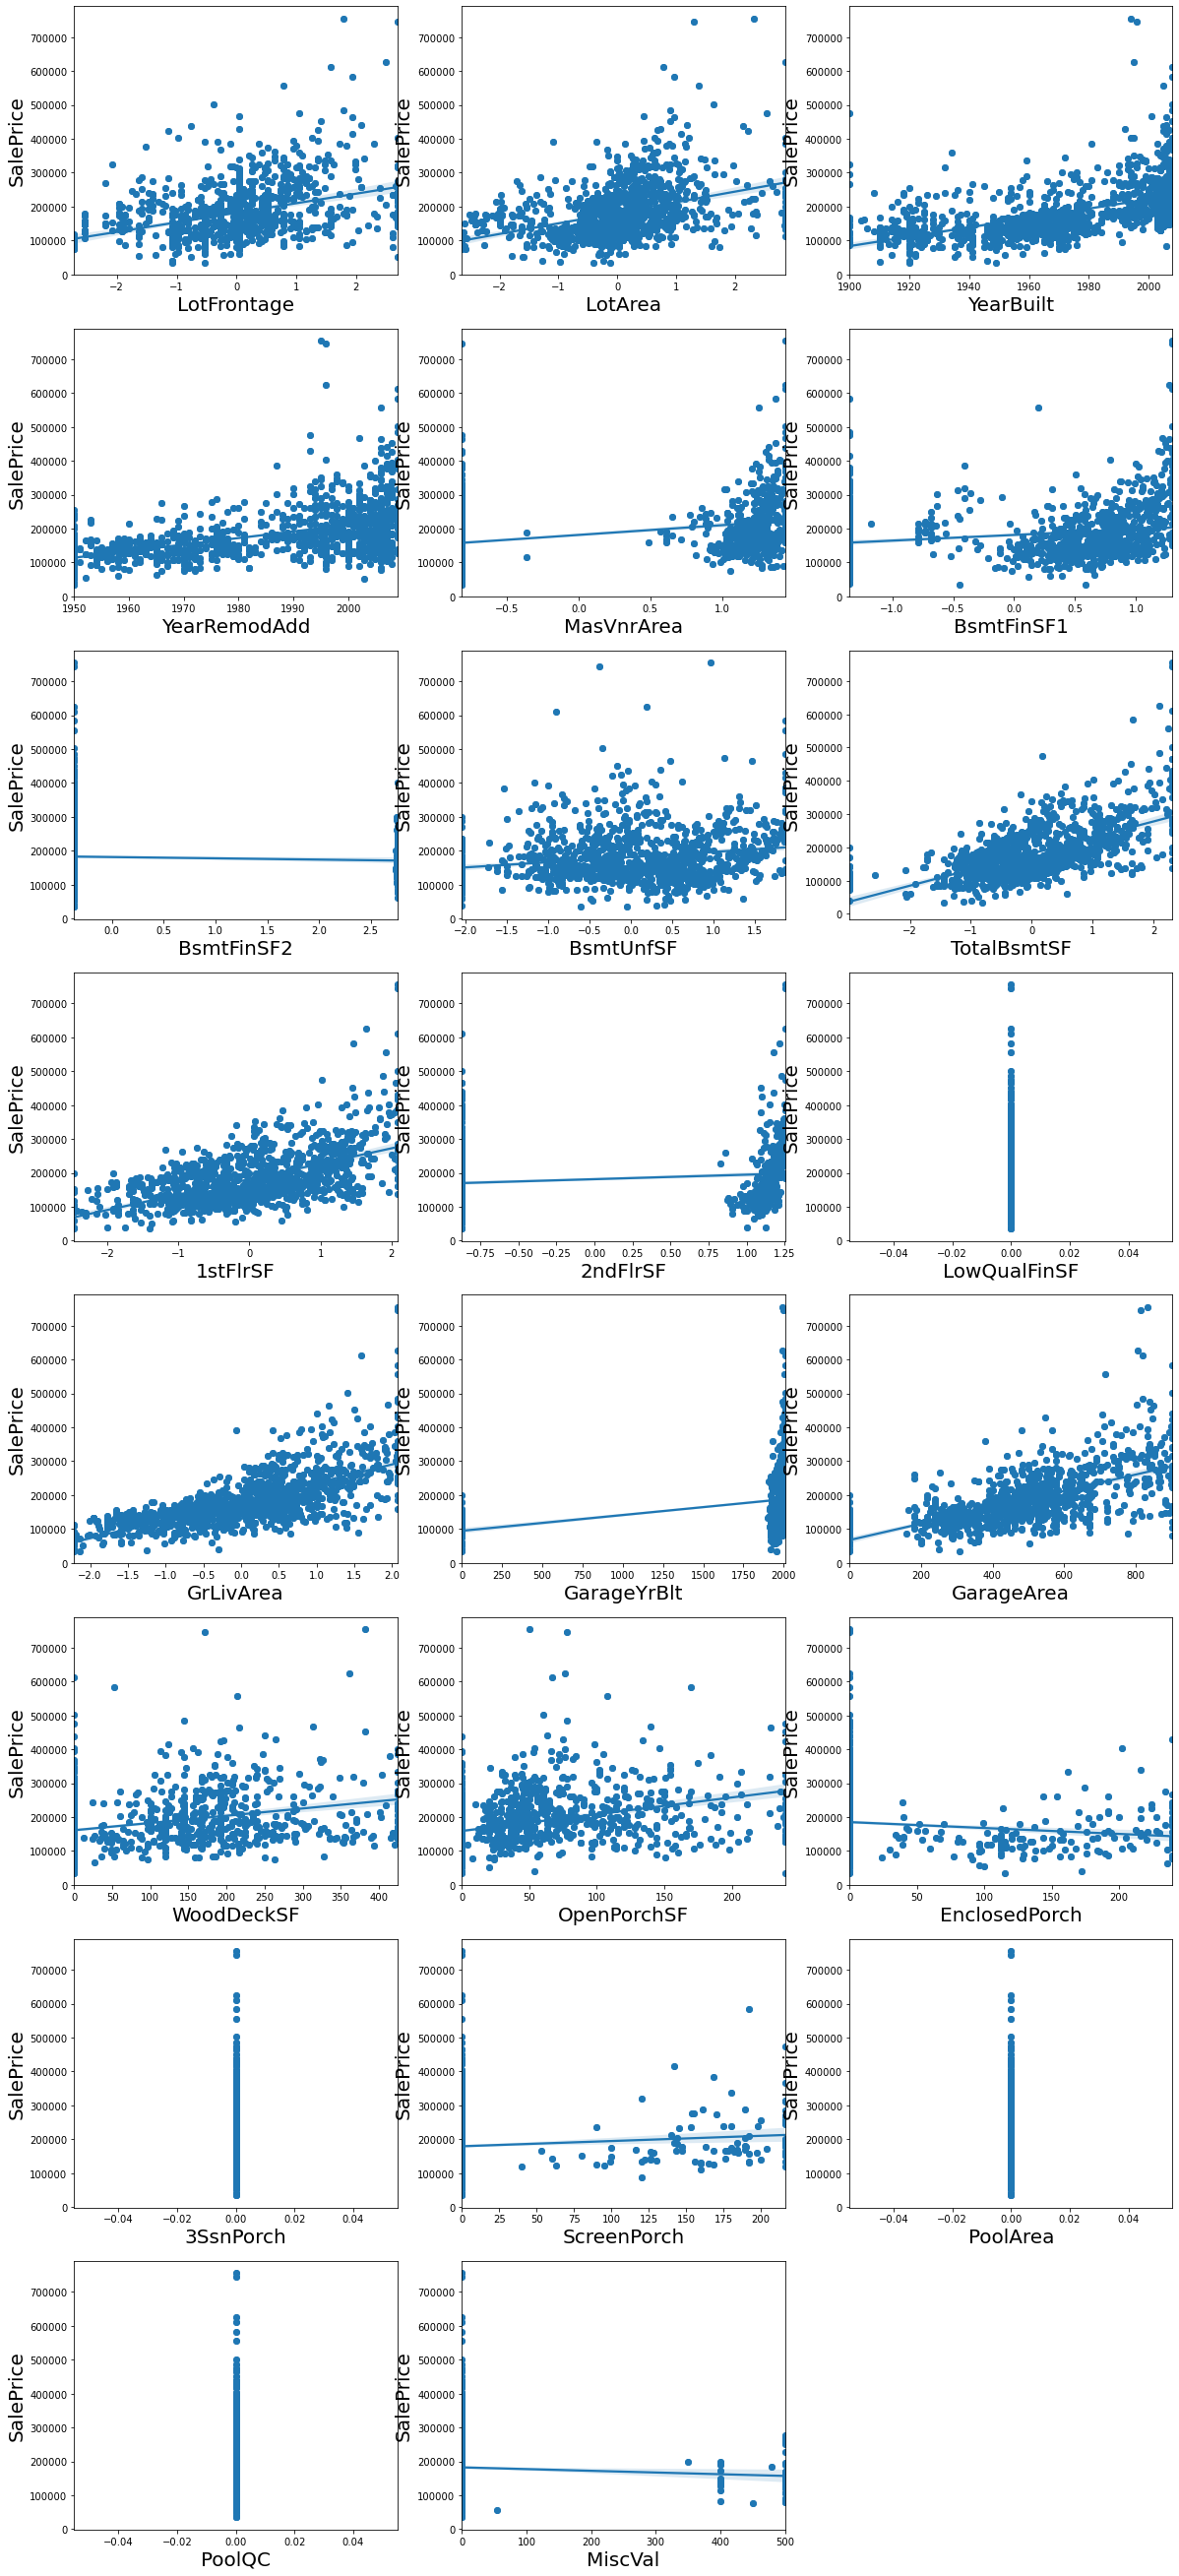

In [72]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for i in ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal']:
    if plotnumber<=len(['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal']):
        ax=plt.subplot(50,3,plotnumber)
        sn.regplot(data[i],data['SalePrice'])
        plt.scatter(data[i],data['SalePrice'])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
    plotnumber+=1
plt.show()

### observations:
### Column OpenporchSF, WoodDeckSF, GarageArea, GarageYrBuilt, GrlivArea, 1stflrsf, 2ndflrsf, totalbsmtsf, YearremodAdd, Yearbuilt , lotfrontage,lotarea, masvnrarea, bsmntfinsf1 have positive correlation w.r.t salesprice
### column MiscVal, Enclosedporch have slight negative correlation
### remaining columns dont have correlation w.r.t salesprice

### Plot graph showing categorical columns value point and the resp mean of salesprice for that category

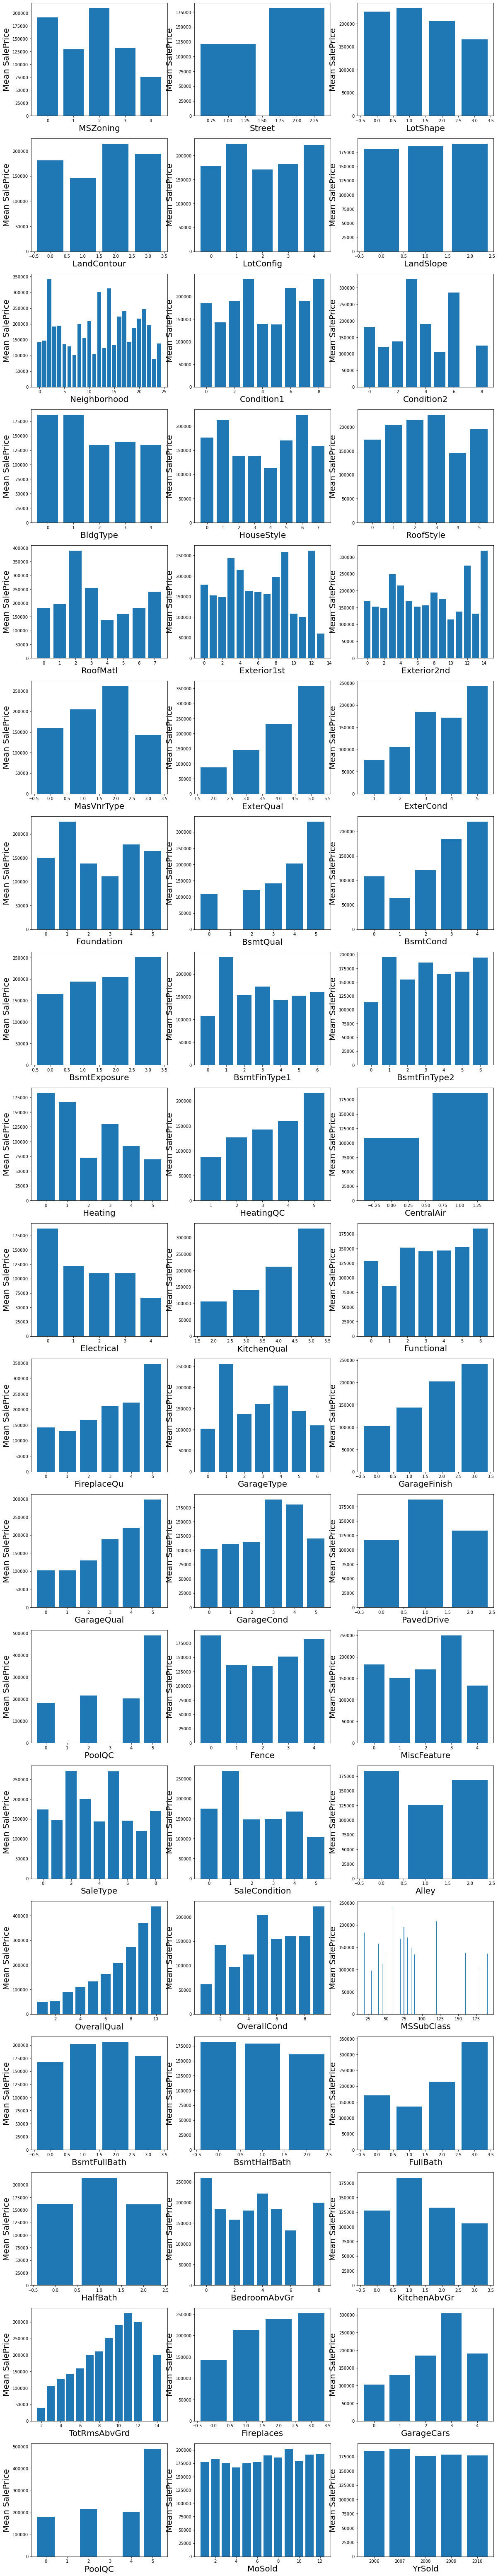

In [22]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for i in ['MSZoning','Street','LotShape','LandContour','LotConfig',
          'LandSlope','Neighborhood','Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd',
         'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
         'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
          'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
          'SaleType','SaleCondition','Alley','OverallQual','OverallCond','MSSubClass','BsmtFullBath','BsmtHalfBath',
         'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','PoolQC','MoSold',
         'YrSold']:
    listy=[]
    misty=[]
    for j in data[i].unique():
        listy.append(j)
        #print(i,j,data[data[i]==j]['SalePrice'].mean())
        misty.append(round(data[data[i]==j]['SalePrice'].mean()))
    ax=plt.subplot(50,3,plotnumber)
    plt.bar(listy,misty)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Mean SalePrice',fontsize=20)
    plotnumber+=1
plt.show()

### from above we can observe that categorical datapoints of columns landslope, mosold, yrsold, bsmtfullbath, bsmthalfbath have equal mean value of salesprice throughout their resp category, hence drop them

In [23]:
data=data.drop(['LandSlope','MoSold','YrSold','BsmtFullBath','BsmtHalfBath'],axis=1)

### check dist plot of all columns

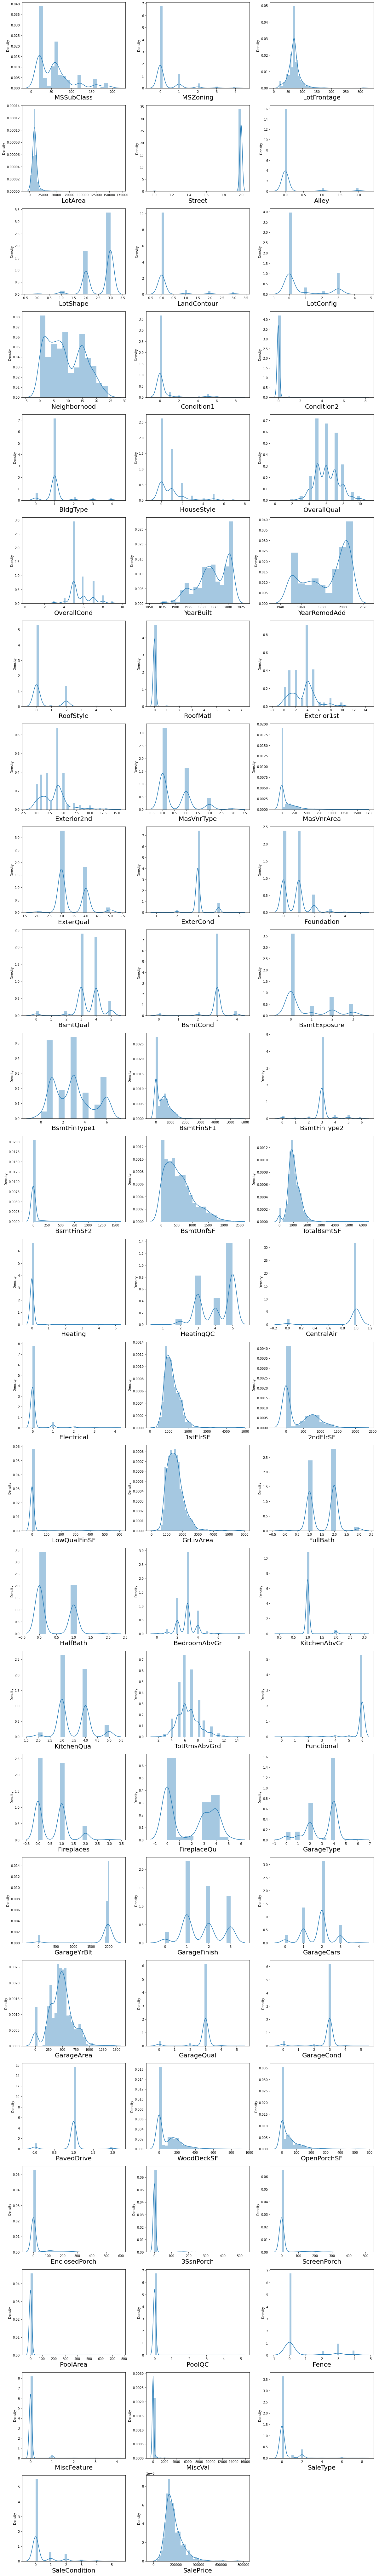

In [24]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for column in data.columns:
    if plotnumber<=len(data.columns):
        ax=plt.subplot(50,3,plotnumber)
        sn.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Columns having normal distribution plots are :
##### LotFrontage, Alley, LandContour, Condition1, Conditional2, BldgType, RoofMatl, MasVnrArea, BsmtCond, BsmtFinType2, BsmtFinSF2
##### LotArea, BsmtUnfSF, TotalBsmtSF, Heating, CentralAir, Electrical, 1stFlrSF, LowQualFinSF, GrLivArea, KitchenAbvGr, Functional, GarageYrBlt
##### Street, GarageQual, GarageCond, PavedDrive, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, SaleType, SalePrice
### Rest all columns have bimodial type distribution plot

### check for outliers in columns with continous value and remove them

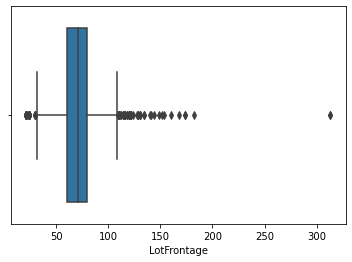

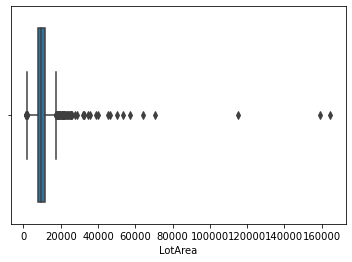

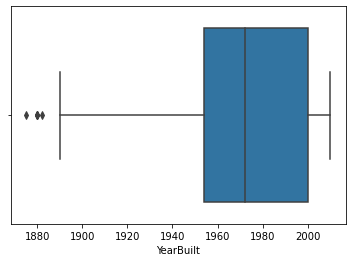

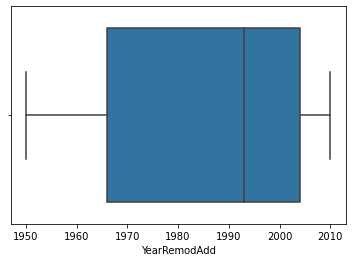

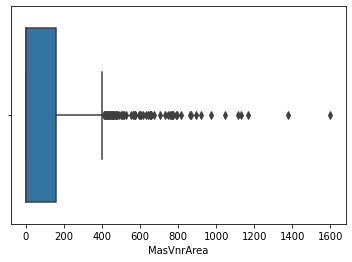

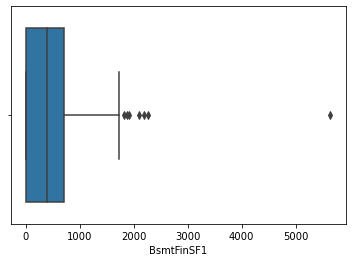

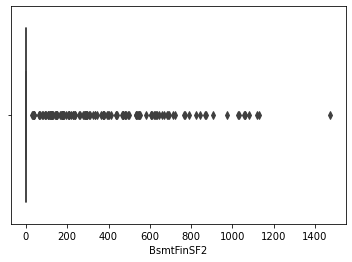

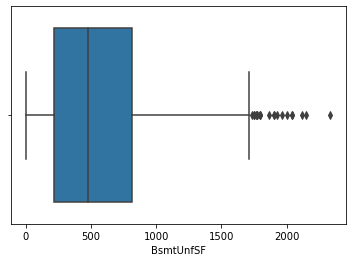

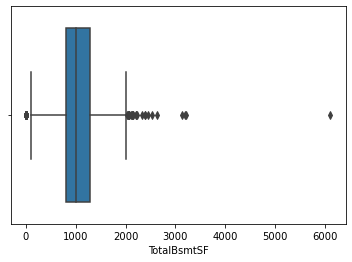

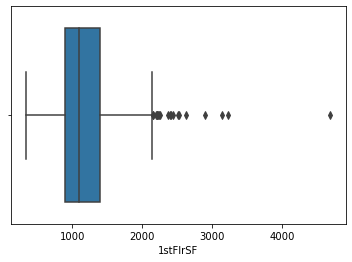

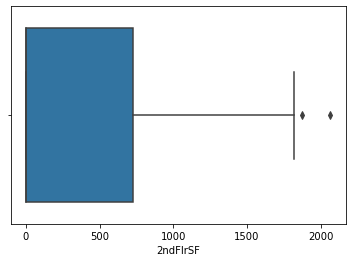

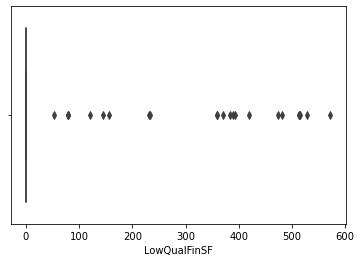

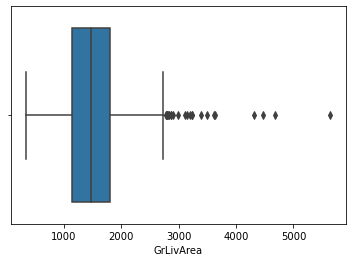

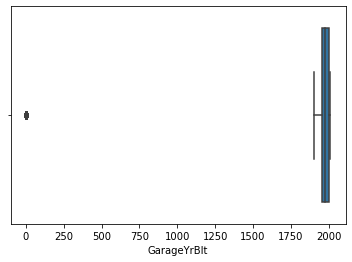

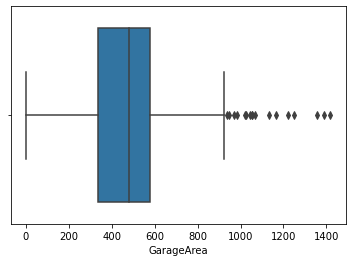

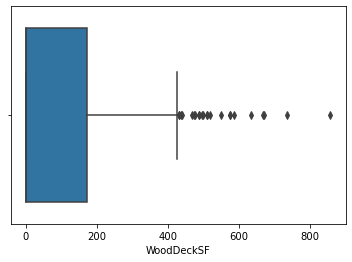

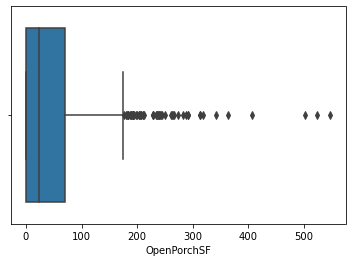

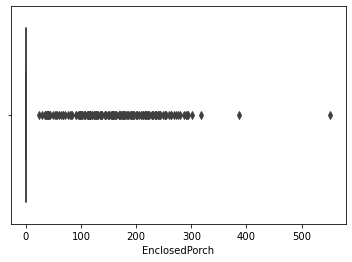

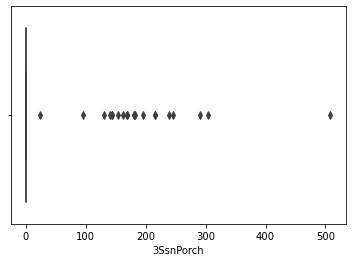

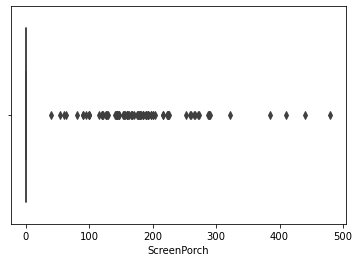

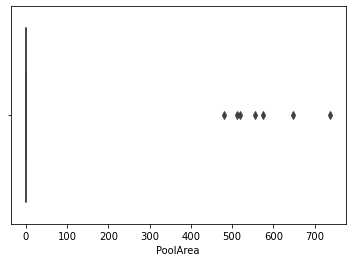

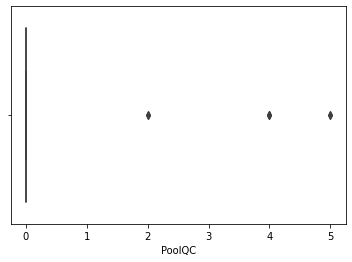

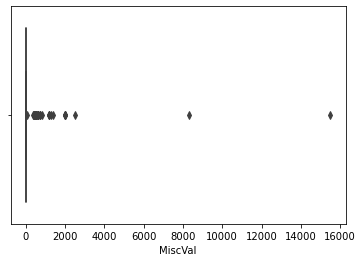

In [25]:
for i in ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal']:
    sn.boxplot(data[i])
    plt.show()

In [26]:
for col in ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal']:
    percentile = data[col].quantile([0.01,0.98]).values
    data[col][data[col]<=percentile[0]]=percentile[0]
    data[col][data[col]>=percentile[1]]=percentile[1]

### outliers have been removed using percentile method 

### check for correlation

In [27]:
data.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.254075    -0.391428 -0.313646 -0.035981   
MSZoning         0.254075  1.000000    -0.264820 -0.297385 -0.144719   
LotFrontage     -0.391428 -0.264820     1.000000  0.536914 -0.044575   
LotArea         -0.313646 -0.297385     0.536914  1.000000 -0.082982   
Street          -0.035981 -0.144719    -0.044575 -0.082982  1.000000   
...                   ...       ...          ...       ...       ...   
MiscFeature     -0.043156 -0.011753     0.001638  0.072093 -0.168210   
MiscVal         -0.041830 -0.017073     0.005869  0.064465 -0.166416   
SaleType         0.019820  0.070564     0.068804  0.034270 -0.070060   
SaleCondition    0.009452  0.099345    -0.007510  0.008286 -0.048460   
SalePrice       -0.060775 -0.186412     0.358467  0.394669  0.044753   

                  Alley  LotShape  LandContour  LotConfig  Neighborhood  \
MSSubClass     0.219025  0.098102    -0.004831  -0.069590      0.260585   
MSZoning       0.399616  0.182510     0.025558  -0.077072      0.305233   
LotFrontage   -0.228363 -0.162248     0.033549   0.221420     -0.204223   
LotArea       -0.180194 -0.369106     0.232810   0.140646     -0.127518   
Street         0.014691 -0.015812    -0.124238  -0.002812     -0.001368   
...                 ...       ...          ...        ...           ...   
MiscFeature   -0.017425 -0.020640     0.006870   0.007781     -0.078331   
MiscVal       -0.009446 -0.026649     0.018274   0.027968     -0.056811   
SaleType       0.004185  0.004860    -0.016480  -0.013129      0.080384   
SaleCondition  0.041600  0.034328     0.037660   0.007559      0.044557   
SalePrice     -0.091040 -0.260263     0.037785   0.029388      0.131472   

               Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
MSSubClass      -0.023324    0.051869  0.337277    0.343075     0.070462   
MSZoning        -0.006534    0.012851  0.077266    0.109436    -0.098151   
LotFrontage      0.035637    0.052471 -0.036341   -0.053587     0.230675   
LotArea          0.076329    0.065742  0.034507   -0.021449     0.197133   
Street           0.018914    0.005213 -0.084129   -0.013332     0.057140   
...                   ...         ...       ...         ...          ...   
MiscFeature      0.021570    0.056474  0.011196   -0.006990    -0.085922   
MiscVal          0.021853    0.039869  0.015461    0.010150    -0.089766   
SaleType         0.017778    0.030660  0.007351   -0.057492     0.142649   
SaleCondition   -0.003598    0.021876  0.047697   -0.024095    -0.012991   
SalePrice       -0.042868    0.001321 -0.145974   -0.073094     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
MSSubClass       -0.056978   0.025389      0.056675  -0.091041 -0.020030   
MSZoning         -0.021200  -0.172026     -0.053993  -0.063084 -0.045332   
LotFrontage      -0.051883   0.126354      0.080784   0.151423  0.076012   
LotArea           0.007684   0.032106      0.036944   0.138781  0.264133   
Street            0.031082   0.020764      0.057868  -0.003046  0.006909   
...                    ...        ...           ...        ...       ...   
MiscFeature       0.066877  -0.071886     -0.092510   0.003460 -0.020905   
MiscVal           0.073730  -0.082316     -0.078440  -0.005957 -0.022426   
SaleType         -0.162328   0.183511      0.146804   0.000079 -0.011620   
SaleCondition    -0.139897   0.019187     -0.014857  -0.008864  0.016249   
SalePrice        -0.065642   0.520707      0.507580   0.172197  0.097071   

               Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
MSSubClass       -0.070999     0.051519   -0.008401    0.024741   0.032564   
MSZoning         -0.060467    -0.027092   -0.134001   -0.089077  -0.079371   
LotFrontage       0.024021    -0.047239    0.143269    0.201677   0.158704   
LotArea          -0.055666    -0.111858    0.074378    0.136186   0.101575   
Street            0.038150     0.

### use heatmap to visualize corr

<AxesSubplot:>

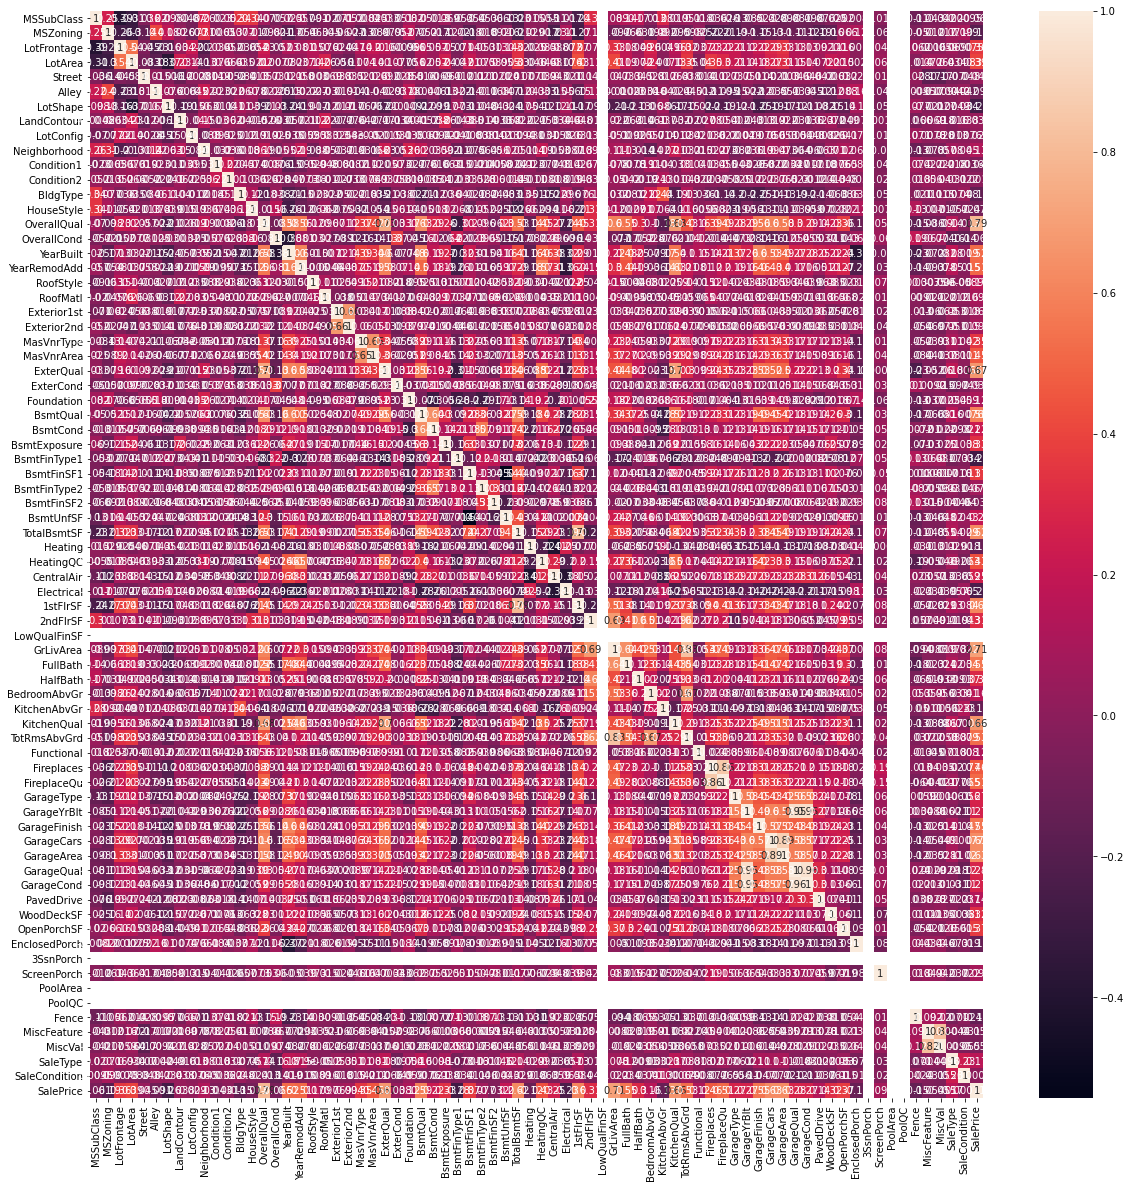

In [28]:
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(data.corr(),annot=True,ax=ax)

### split feature columns and target column

In [29]:
y = data[['SalePrice']]
x = data.drop(columns = ['SalePrice'])

In [31]:
newdata=data

### check for skewness in columns having continous value

In [32]:
features=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','LotFrontage']
print(newdata[features].skew())
print(len(newdata[features].skew().loc[newdata[features].skew()>0.55]))

LotArea         1.191912
MasVnrArea      1.877102
BsmtFinSF1      0.639523
BsmtFinSF2      3.543134
BsmtUnfSF       0.777624
TotalBsmtSF     0.166773
1stFlrSF        0.645842
2ndFlrSF        0.717390
LowQualFinSF    0.000000
GrLivArea       0.592755
LotFrontage     0.187719
dtype: float64
8


### remove skewness using power transformer method of yeo

In [33]:
scaler = PowerTransformer(method='yeo-johnson',standardize=True)
#applying Power Transformation method for this particular column
newdata[features] = scaler.fit_transform(newdata[features])

In [34]:
print(newdata[features].skew())
print(len(newdata[features].skew().loc[newdata[features].skew()>0.55]))

LotArea         0.077862
MasVnrArea      0.438357
BsmtFinSF1     -0.418554
BsmtFinSF2      2.394737
BsmtUnfSF      -0.304290
TotalBsmtSF    -0.155420
1stFlrSF       -0.000731
2ndFlrSF        0.279883
LowQualFinSF    0.000000
GrLivArea      -0.005974
LotFrontage     0.088373
dtype: float64
1


In [35]:
newdata['SalePrice']=y
newdata

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            120         0     0.049953 -1.306083       2      0         2   
1             20         0     1.312469  1.356458       2      0         2   
2             60         0     1.156118  0.113089       2      0         2   
3             20         0     1.831003  0.530989       2      0         2   
4             20         0     0.049953  1.497522       2      0         2   
...          ...       ...          ...       ...     ...    ...       ...   
1163          20         0     0.049953  0.088869       2      0         2   
1164          20         0    -0.163372 -0.169301       2      0         3   
1165         160         0    -2.537190 -2.422001       2      0         3   
1166          70         4    -1.081627 -0.240685       2      2         3   
1167          60         0     0.049953 -0.410304       2      0         2   

      LandContour  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
0               0          0             0           0           0         0   
1               0          0             1           0           0         1   
2               0          1             2           0           0         1   
3               0          0             3           0           0         1   
4               0          2             3           0           0         1   
...           ...        ...           ...         ...         ...       ...   
1163            0          0             5           0           0         1   
1164            0          0             6           1           0         1   
1165            0          2             0           0           0         3   
1166            0          0             7           1           0         1   
1167            0          0             4           0           0         1   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0              0            6            5       1976          1976   
1              0            8            6       1970          1970   
2              1            7            5       1996          1997   
3              0            6            6       1977          1977   
4              0            6            7       1977          2000   
...          ...          ...          ...        ...           ...   
1163           0            5            5       1967          1967   
1164           0            4            5       1949          2003   
1165           1            6            6       1976          1976   
1166           1            4            4       1920          1950   
1167           1            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0             0         0            0            0           0   -0.813049   
1             1         1            1            1           0   -0.813049   
2             0         0            2            2           0   -0.813049   
3             2         0            0            0           1    1.392506   
4             0         0            3            3           2    1.157646   
...         ...       ...          ...          ...         ...         ...   
1163          0         0            2            2           1    0.815339   
1164          0         0            4            4           0   -0.813049   
1165          0         0            0           13           0   -0.813049   
1166          4         0            8            8           0   -0.813049   
1167          0         0            4            4           0   -0.813049   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0             3          3           0         4         3             0   
1             4          4           1         3         4             3   
2             4          3           1         4         3             2   
3 

In [36]:
y = newdata[['SalePrice']]
x = newdata.drop(columns = ['SalePrice'])

### Perform feature scaling on feature columns

In [37]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

### build a function to obtain best train test split for model

In [38]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

### WAP to build and iterate thro to many models and the best models with highest accuracy

In [39]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor(),LogisticRegression(),ExtraTreesRegressor()]

In [40]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2',n_jobs=-1)
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.84202015532579
r2 0.817042062025452
diff 0.024978093300337956
mae 18491.01004254228
rmse 35728.1398169082
**********
NuSVR()
score -0.01638660649302821
r2 -0.008689780769930655
diff 0.007696825723097555
mae 57484.218333046425
rmse 83890.65538631662
**********
LinearRegression()
score 0.8018427485473225
r2 0.7716364558845128
diff 0.03020629266280972
mae 21650.755540611055
rmse 39916.1057061981
**********
Ridge()
score 0.8022439202493714
r2 0.7717781004919595
diff 0.030465819757411916
mae 21623.92812544445
rmse 39903.72461853671
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.8052810050772298
r2 0.7725759243164028
diff 0.03270508076082701
mae 21429.939870235718
rmse 39833.915335579455
**********
BayesianRidge()
score 0.8107655886398216
r2 0.7734656691261194
diff 0.03729991951370226
mae 21175.833242136607
rmse 39755.91842168027
**********
SGDRegressor()
score 0.798033691154122
r2 0.7696370802710762
diff 0.028396610883045792
mae 2

### from above we get to know that the top 5 models are: ExtratreesRegressor, LGMBRegressor, GradientboostingRegressor, RandomForestRegressor & XGBRegressor

### fine tune all thse models

In [41]:
parameters={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
clf = RandomizedSearchCV(LGBMRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.2s finished


{'colsample_bytree': 0.8564498104950464,
 'min_child_samples': 143,
 'min_child_weight': 0.001,
 'num_leaves': 43,
 'reg_alpha': 50,
 'reg_lambda': 0.1,
 'subsample': 0.775365789539042}

In [57]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


{'n_estimators': 100, 'max_features': 'sqrt', 'criterion': 'mse'}

In [43]:
parameters={"n_estimators":[10,100,500],"criterion":['friedman_mse', 'mse','mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 120 out of 135 | elapsed:  1.3min remaining:    9.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  4.0min finished


{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 500}

In [45]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = GridSearchCV(XGBRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   52.7s finished


{'max_depth': 7, 'n_estimators': 100, 'reg_lambda': 0.2}

In [46]:
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2']}

GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5,n_jobs=-1,verbose=1)
GCV.fit(x,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 16.7min finished


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 100, 1000]},
             verbose=1)

In [47]:
GCV.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 100}

### find the best train test split random state for extratreesregressor

In [48]:
besttrain(ExtraTreesRegressor(n_estimators=100,criterion='mse',max_features='auto',min_samples_split=3),x,y)

98

### As we know the above models dont have acc above 90% so we shall stack all these models to get higher acc

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=98, test_size=0.2)
stack = StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.8564498104950464,min_child_samples=143,
                                                      min_child_weight= 0.001,num_leaves= 43,reg_alpha= 50,reg_lambda= 0.1,
                                                      subsample= 0.775365789539042), 
                                    GradientBoostingRegressor(criterion='mse',n_estimators=500,max_features='auto'),
                                    RandomForestRegressor(criterion='mse',max_features='sqrt',n_estimators=100),
                                    XGBRegressor(max_depth=7,n_estimators=100,reg_lambda=0.2),
                                    ExtraTreesRegressor(n_estimators=100,criterion='mse',max_features='auto',min_samples_split=3)
                                       ),
                            meta_regressor=ExtraTreesRegressor(n_estimators=100,criterion='mse',max_features='auto',min_samples_split=3), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.9078859412355391
r2 score train 0.9830117423689891


### from above we can see the rise in acc of train & test

In [71]:
y_pred=stack.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(StackingCVRegressor(regressors=(LGBMRegressor(colsample_bytree=0.8564498104950464,min_child_samples=143,
                                                      min_child_weight= 0.001,num_leaves= 43,reg_alpha= 50,reg_lambda= 0.1,
                                                      subsample= 0.775365789539042), 
                                    GradientBoostingRegressor(criterion='mse',n_estimators=500,max_features='auto'),
                                    RandomForestRegressor(criterion='mse',max_features='sqrt',n_estimators=100),
                                    XGBRegressor(max_depth=7,n_estimators=100,reg_lambda=0.2),
                                    ExtraTreesRegressor(n_estimators=100,criterion='mse',max_features='auto',min_samples_split=3)
                                       ),
                            meta_regressor=ExtraTreesRegressor(n_estimators=100,criterion='mse',max_features='auto',min_samples_split=3), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False),x,y,cv=5,n_jobs=-1,verbose=1)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.9078859412355391
mean absolute error: 16239.447371794871
mean squared error: 590062086.6485324
root mean square error: 24291.19360279631


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   57.1s remaining:  1.4min


cross val score 0.877590489610059
std err 0.027575911682454043


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   58.1s finished


### From above we can see that model acc is above 90%
### cross val score is above 87%

### predict the salesprice for whole dataset and compare the actual value with predicted value

In [67]:
y_pred=stack.predict(x)
newdata['Pred']=[round(i) for i in y_pred]
newdata

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            120         0     0.049953 -1.306083       2      0         2   
1             20         0     1.312469  1.356458       2      0         2   
2             60         0     1.156118  0.113089       2      0         2   
3             20         0     1.831003  0.530989       2      0         2   
4             20         0     0.049953  1.497522       2      0         2   
...          ...       ...          ...       ...     ...    ...       ...   
1163          20         0     0.049953  0.088869       2      0         2   
1164          20         0    -0.163372 -0.169301       2      0         3   
1165         160         0    -2.537190 -2.422001       2      0         3   
1166          70         4    -1.081627 -0.240685       2      2         3   
1167          60         0     0.049953 -0.410304       2      0         2   

      LandContour  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
0               0          0             0           0           0         0   
1               0          0             1           0           0         1   
2               0          1             2           0           0         1   
3               0          0             3           0           0         1   
4               0          2             3           0           0         1   
...           ...        ...           ...         ...         ...       ...   
1163            0          0             5           0           0         1   
1164            0          0             6           1           0         1   
1165            0          2             0           0           0         3   
1166            0          0             7           1           0         1   
1167            0          0             4           0           0         1   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0              0            6            5       1976          1976   
1              0            8            6       1970          1970   
2              1            7            5       1996          1997   
3              0            6            6       1977          1977   
4              0            6            7       1977          2000   
...          ...          ...          ...        ...           ...   
1163           0            5            5       1967          1967   
1164           0            4            5       1949          2003   
1165           1            6            6       1976          1976   
1166           1            4            4       1920          1950   
1167           1            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0             0         0            0            0           0   -0.813049   
1             1         1            1            1           0   -0.813049   
2             0         0            2            2           0   -0.813049   
3             2         0            0            0           1    1.392506   
4             0         0            3            3           2    1.157646   
...         ...       ...          ...          ...         ...         ...   
1163          0         0            2            2           1    0.815339   
1164          0         0            4            4           0   -0.813049   
1165          0         0            0           13           0   -0.813049   
1166          4         0            8            8           0   -0.813049   
1167          0         0            4            4           0   -0.813049   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0             3          3           0         4         3             0   
1             4          4           1         3         4             3   
2             4          3           1         4         3             2   
3 

### find the diff between actual and predicted values

In [68]:
newdata['Diff']=newdata['SalePrice']-newdata['Pred']
newdata

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            120         0     0.049953 -1.306083       2      0         2   
1             20         0     1.312469  1.356458       2      0         2   
2             60         0     1.156118  0.113089       2      0         2   
3             20         0     1.831003  0.530989       2      0         2   
4             20         0     0.049953  1.497522       2      0         2   
...          ...       ...          ...       ...     ...    ...       ...   
1163          20         0     0.049953  0.088869       2      0         2   
1164          20         0    -0.163372 -0.169301       2      0         3   
1165         160         0    -2.537190 -2.422001       2      0         3   
1166          70         4    -1.081627 -0.240685       2      2         3   
1167          60         0     0.049953 -0.410304       2      0         2   

      LandContour  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
0               0          0             0           0           0         0   
1               0          0             1           0           0         1   
2               0          1             2           0           0         1   
3               0          0             3           0           0         1   
4               0          2             3           0           0         1   
...           ...        ...           ...         ...         ...       ...   
1163            0          0             5           0           0         1   
1164            0          0             6           1           0         1   
1165            0          2             0           0           0         3   
1166            0          0             7           1           0         1   
1167            0          0             4           0           0         1   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0              0            6            5       1976          1976   
1              0            8            6       1970          1970   
2              1            7            5       1996          1997   
3              0            6            6       1977          1977   
4              0            6            7       1977          2000   
...          ...          ...          ...        ...           ...   
1163           0            5            5       1967          1967   
1164           0            4            5       1949          2003   
1165           1            6            6       1976          1976   
1166           1            4            4       1920          1950   
1167           1            6            5       2002          2003   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0             0         0            0            0           0   -0.813049   
1             1         1            1            1           0   -0.813049   
2             0         0            2            2           0   -0.813049   
3             2         0            0            0           1    1.392506   
4             0         0            3            3           2    1.157646   
...         ...       ...          ...          ...         ...         ...   
1163          0         0            2            2           1    0.815339   
1164          0         0            4            4           0   -0.813049   
1165          0         0            0           13           0   -0.813049   
1166          4         0            8            8           0   -0.813049   
1167          0         0            4            4           0   -0.813049   

      ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0             3          3           0         4         3             0   
1             4          4           1         3         4             3   
2             4          3           1         4         3             2   
3 

### find the max, min and mean of diff between actual and predicted values

In [65]:
newdata['Diff'].max(),newdata['Diff'].min(),newdata['Diff'].mean()

(89259, -95990, -192.24058219178082)

### plot regplot for actual and predicted value

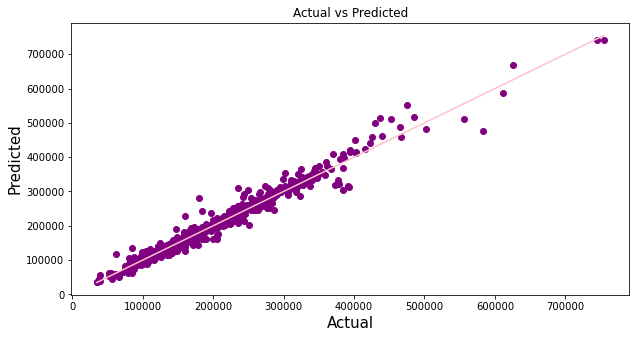

In [76]:
plt.figure(figsize=(10,5))
plt.scatter(newdata['SalePrice'], newdata['Pred'], c='purple')
p1 = max(max(newdata['Pred']), max(newdata['SalePrice']))
p2 = min(min(newdata['Pred']), min(newdata['SalePrice']))
plt.plot([p1, p2], [p1, p2], 'pink')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Actual vs Predicted")
plt.show()

### compare dist value of actual value and pred value

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

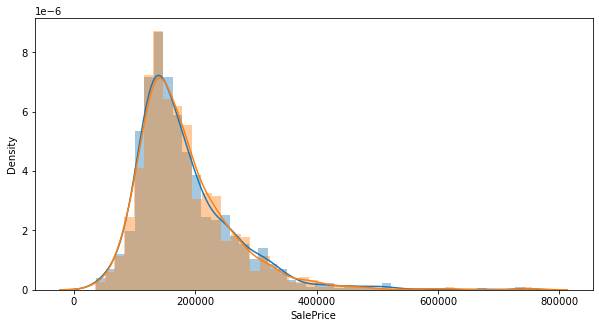

In [78]:
plt.figure(figsize=(10,5))
sn.distplot(newdata['Pred'])
sn.distplot(newdata['SalePrice'])

### Save model for further use

In [73]:
joblib.dump(stack,'House_Price_Prediction.pkl')

['House_Price_Prediction.pkl']

### import test dataset and perform all the steps which were performed on train dataset to prep data

In [148]:
test=pd.read_csv('test.csv')
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

In [149]:
print('Dataset contains any null values:',test.isnull().values.any())

Dataset contains any null values: True


In [150]:
listy=['Alley','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu',
      'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','Electrical']
for j in listy:
    for i in range(len(test[j])):
        if str(test[j][i])=='nan' or str(test[j][i])=='None' or str(test[j][i])=='NA' or str(test[j][i])=='No':
            test[j][i]=0
test['LotFrontage']=test['LotFrontage'].fillna(round(test['LotFrontage'].mean()))

In [151]:
print('Dataset contains any null values:',test.isnull().values.any())

Dataset contains any null values: False


In [152]:
test=test.drop(['Id'],axis=1)
test=test.drop(['Utilities'],axis=1)

In [153]:
dicty['Exterior1st']['CBlock']=15
dicty['Exterior2nd']['CBlock']=15
dicty['Electrical'][0]=5
for j in ['MSZoning','Street','LotShape','LandContour','LotConfig',
          'LandSlope','Neighborhood','Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd',
         'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
         'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
          'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
          'SaleType','SaleCondition','Alley']:
    for i in [j]:
        #print(i)
        test[i]=test[i].apply(lambda x:dicty[i][x])

In [155]:
test=test.drop(['LandSlope','MoSold','YrSold','BsmtFullBath','BsmtHalfBath'],axis=1)

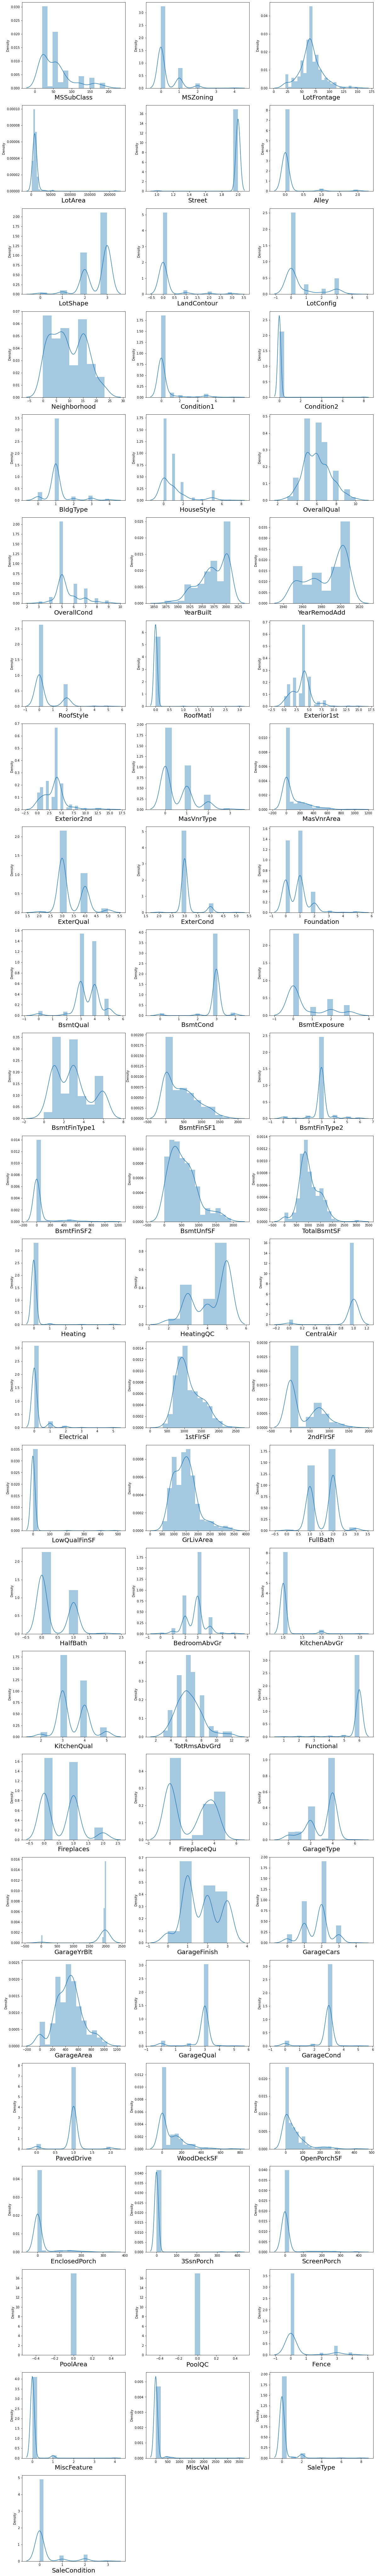

In [156]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for column in test.columns:
    if plotnumber<=len(test.columns):
        ax=plt.subplot(50,3,plotnumber)
        sn.distplot(test[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

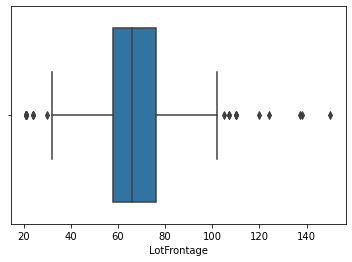

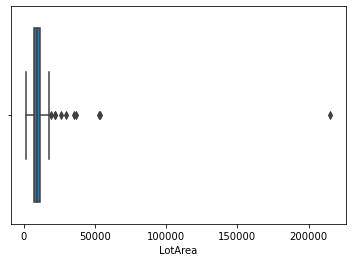

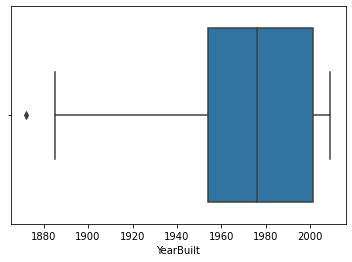

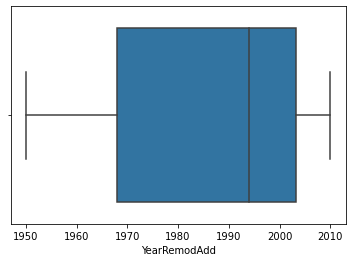

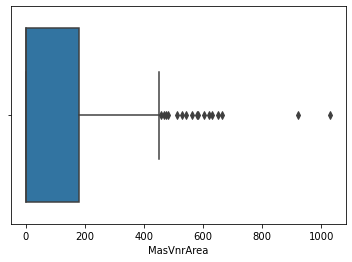

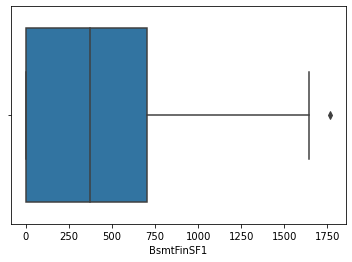

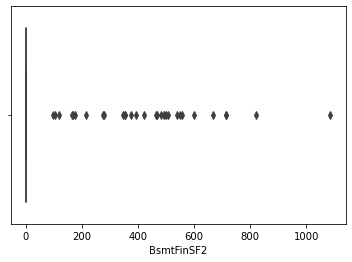

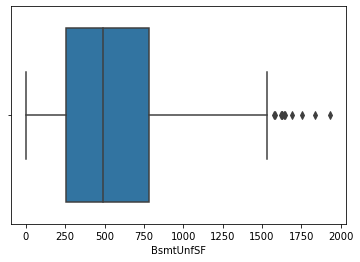

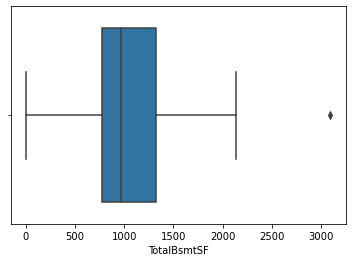

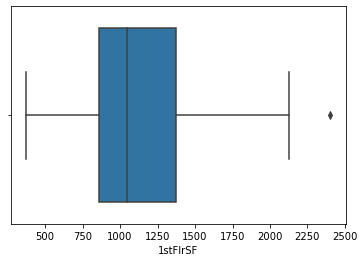

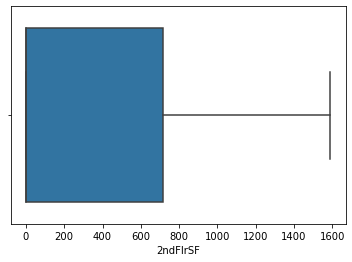

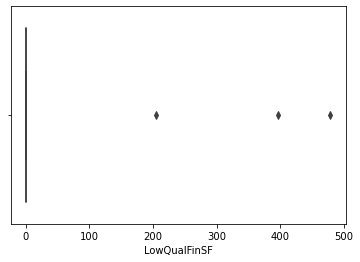

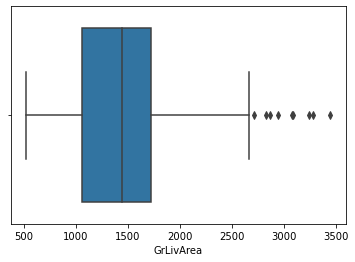

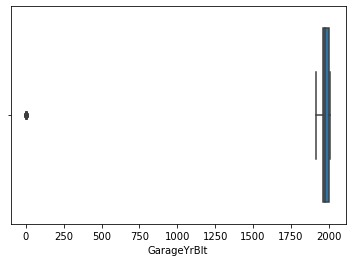

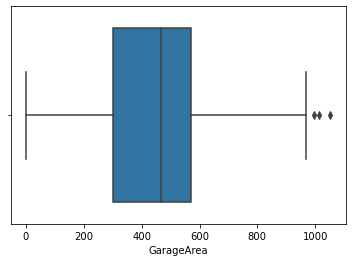

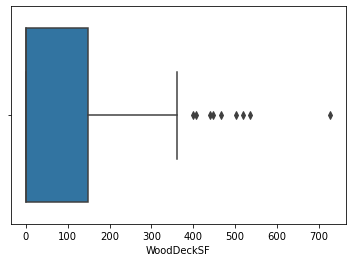

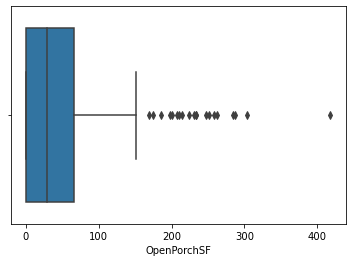

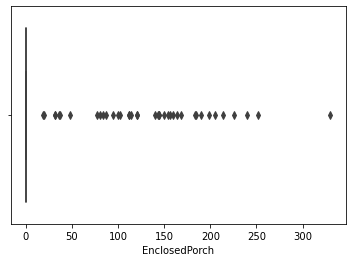

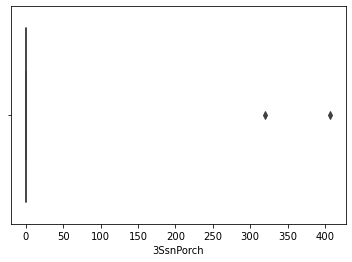

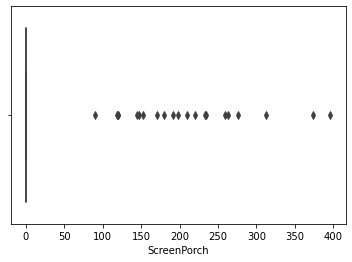

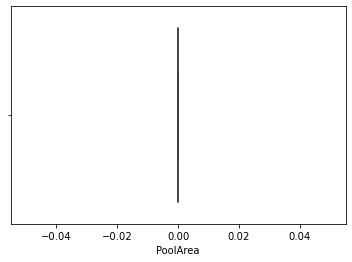

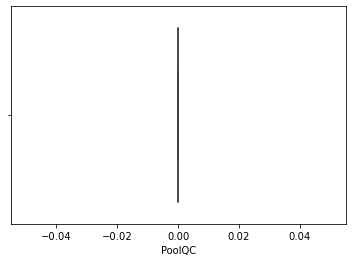

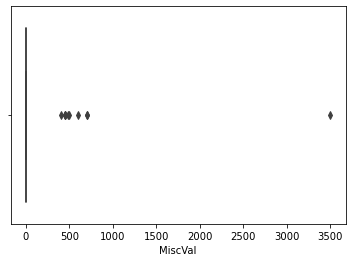

In [157]:
for i in ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal']:
    sn.boxplot(test[i])
    plt.show()

In [158]:
for col in ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
         '3SsnPorch','ScreenPorch','PoolArea','PoolQC','MiscVal']:
    percentile = test[col].quantile([0.01,0.98]).values
    test[col][test[col]<=percentile[0]]=percentile[0]
    test[col][test[col]>=percentile[1]]=percentile[1]

<AxesSubplot:>

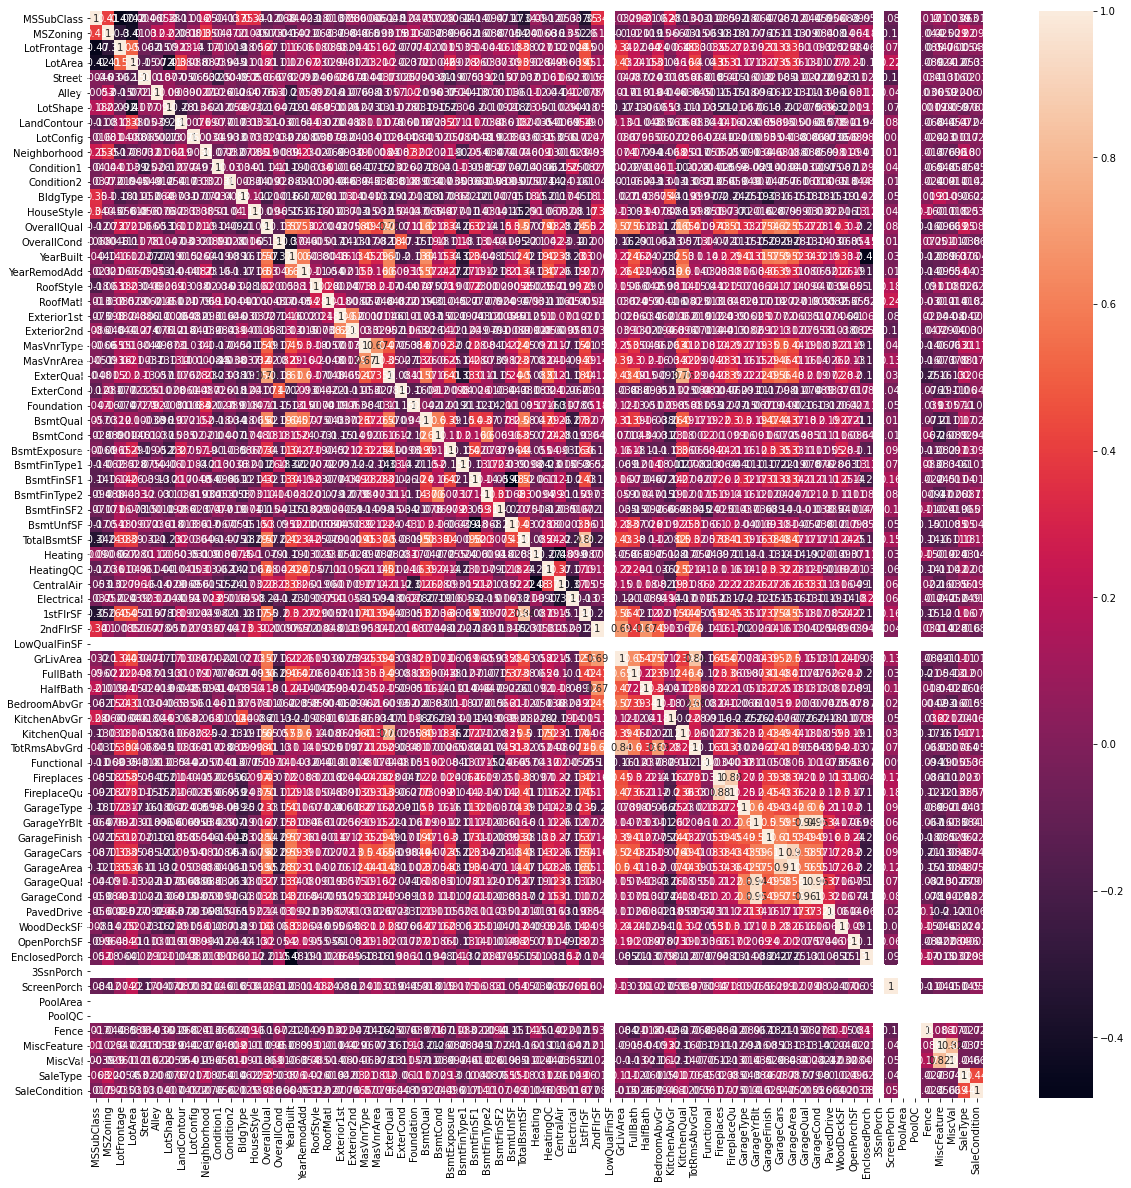

In [159]:
fig, ax = plt.subplots(figsize=(20,20))
sn.heatmap(test.corr(),annot=True,ax=ax)

In [160]:
features=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
         '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','LotFrontage']
print(test[features].skew())
print(len(test[features].skew().loc[test[features].skew()>0.55]))

LotArea         1.266527
MasVnrArea      1.548284
BsmtFinSF1      0.639990
BsmtFinSF2      3.122548
BsmtUnfSF       0.873375
TotalBsmtSF     0.149160
1stFlrSF        0.596239
2ndFlrSF        0.689956
LowQualFinSF    0.000000
GrLivArea       0.790479
LotFrontage    -0.006453
dtype: float64
8


In [161]:
Scaler = PowerTransformer(method='yeo-johnson',standardize=True)
#applying Power Transformation method for this particular column
test[features] = Scaler.fit_transform(test[features])

In [162]:
x= scaler.transform(x)

In [163]:
pred=stack.predict(test)

In [164]:
test['Pred']=[round(i) for i in pred]
test

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0            20         0     1.073070  1.012372       2      0         2   
1           120         0    -0.002720 -0.878055       2      0         2   
2            20         0    -0.002720  0.565525       2      0         3   
3            70         0     0.480135  0.598156       2      0         3   
4            60         0     1.073070  1.092887       2      0         2   
..          ...       ...          ...       ...     ...    ...       ...   
287          20         0     0.641557  0.222786       2      0         3   
288          20         0    -0.483245  0.007370       2      0         1   
289          20         0    -0.002720  0.443206       2      0         2   
290          50         1    -0.855156 -1.126366       2      0         3   
291         160         1    -2.372496 -2.329869       2      0         3   

     LandContour  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
0              2          3            12           0           0         1   
1              0          1            12           0           0         0   
2              0          0             8           0           0         1   
3              1          0            10           0           0         1   
4              0          1            16           1           0         1   
..           ...        ...           ...         ...         ...       ...   
287            0          0            16           0           0         1   
288            0          0             8           0           0         1   
289            0          1             1           0           0         1   
290            0          3            13           1           0         1   
291            0          0            11           0           0         3   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0             0            9            5     2005.0          2006          2   
1             0            8            5     1984.0          1984          0   
2             0            8            5     2001.0          2001          2   
3             1            7            7     1941.0          1950          0   
4             1            6            5     2007.0          2007          0   
..          ...          ...          ...        ...           ...        ...   
287           0            8            5     2007.0          2007          0   
288           0            5            5     1994.0          1995          0   
289           0            6            7     1970.0          1970          0   
290           2            6            7     1947.0          1950          0   
291           1            6            5     1973.0          1973          0   

     RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0           0            4            4           2    1.192366          4   
1           0            5            5           0   -0.840957          4   
2           0            4            4           0   -0.840957          4   
3           0            2            2           0   -0.840957          3   
4           0            4            4           2    0.965657          4   
..        ...          ...          ...         ...         ...        ...   
287         0            4            4           2    1.352555          3   
288         0            4            4           0   -0.840957          3   
289         0            1            1           1    1.170464          3   
290         0            3            3           0   -0.840957          3   
291         0            5            5           1    1.328594          3   

     ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0            3           1         5         3             3             1   
1            3           0         4         3             2     

### save the predicted values in a csv file

In [166]:
test.to_csv("House_Price_Predictions.csv",index=False)